## Dragon real Estate - Price predictor

In [4]:
import pandas as pd

In [5]:
housing = pd.read_csv("housing.csv")

In [6]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,NaN,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,NaN,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [7]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       502 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [8]:
housing["CHAS"].value_counts()

CHAS
0    471
1     35
Name: count, dtype: int64

In [9]:
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,502.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284787,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.703959,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [10]:
%matplotlib inline

In [11]:
import matplotlib as plt

array([[<Axes: title={'center': 'CRIM'}>, <Axes: title={'center': 'ZN'}>,
        <Axes: title={'center': 'INDUS'}>,
        <Axes: title={'center': 'CHAS'}>],
       [<Axes: title={'center': 'NOX'}>, <Axes: title={'center': 'RM'}>,
        <Axes: title={'center': 'AGE'}>, <Axes: title={'center': 'DIS'}>],
       [<Axes: title={'center': 'RAD'}>, <Axes: title={'center': 'TAX'}>,
        <Axes: title={'center': 'PTRATIO'}>,
        <Axes: title={'center': 'B'}>],
       [<Axes: title={'center': 'LSTAT'}>,
        <Axes: title={'center': 'MEDV'}>, <Axes: >, <Axes: >]],
      dtype=object)

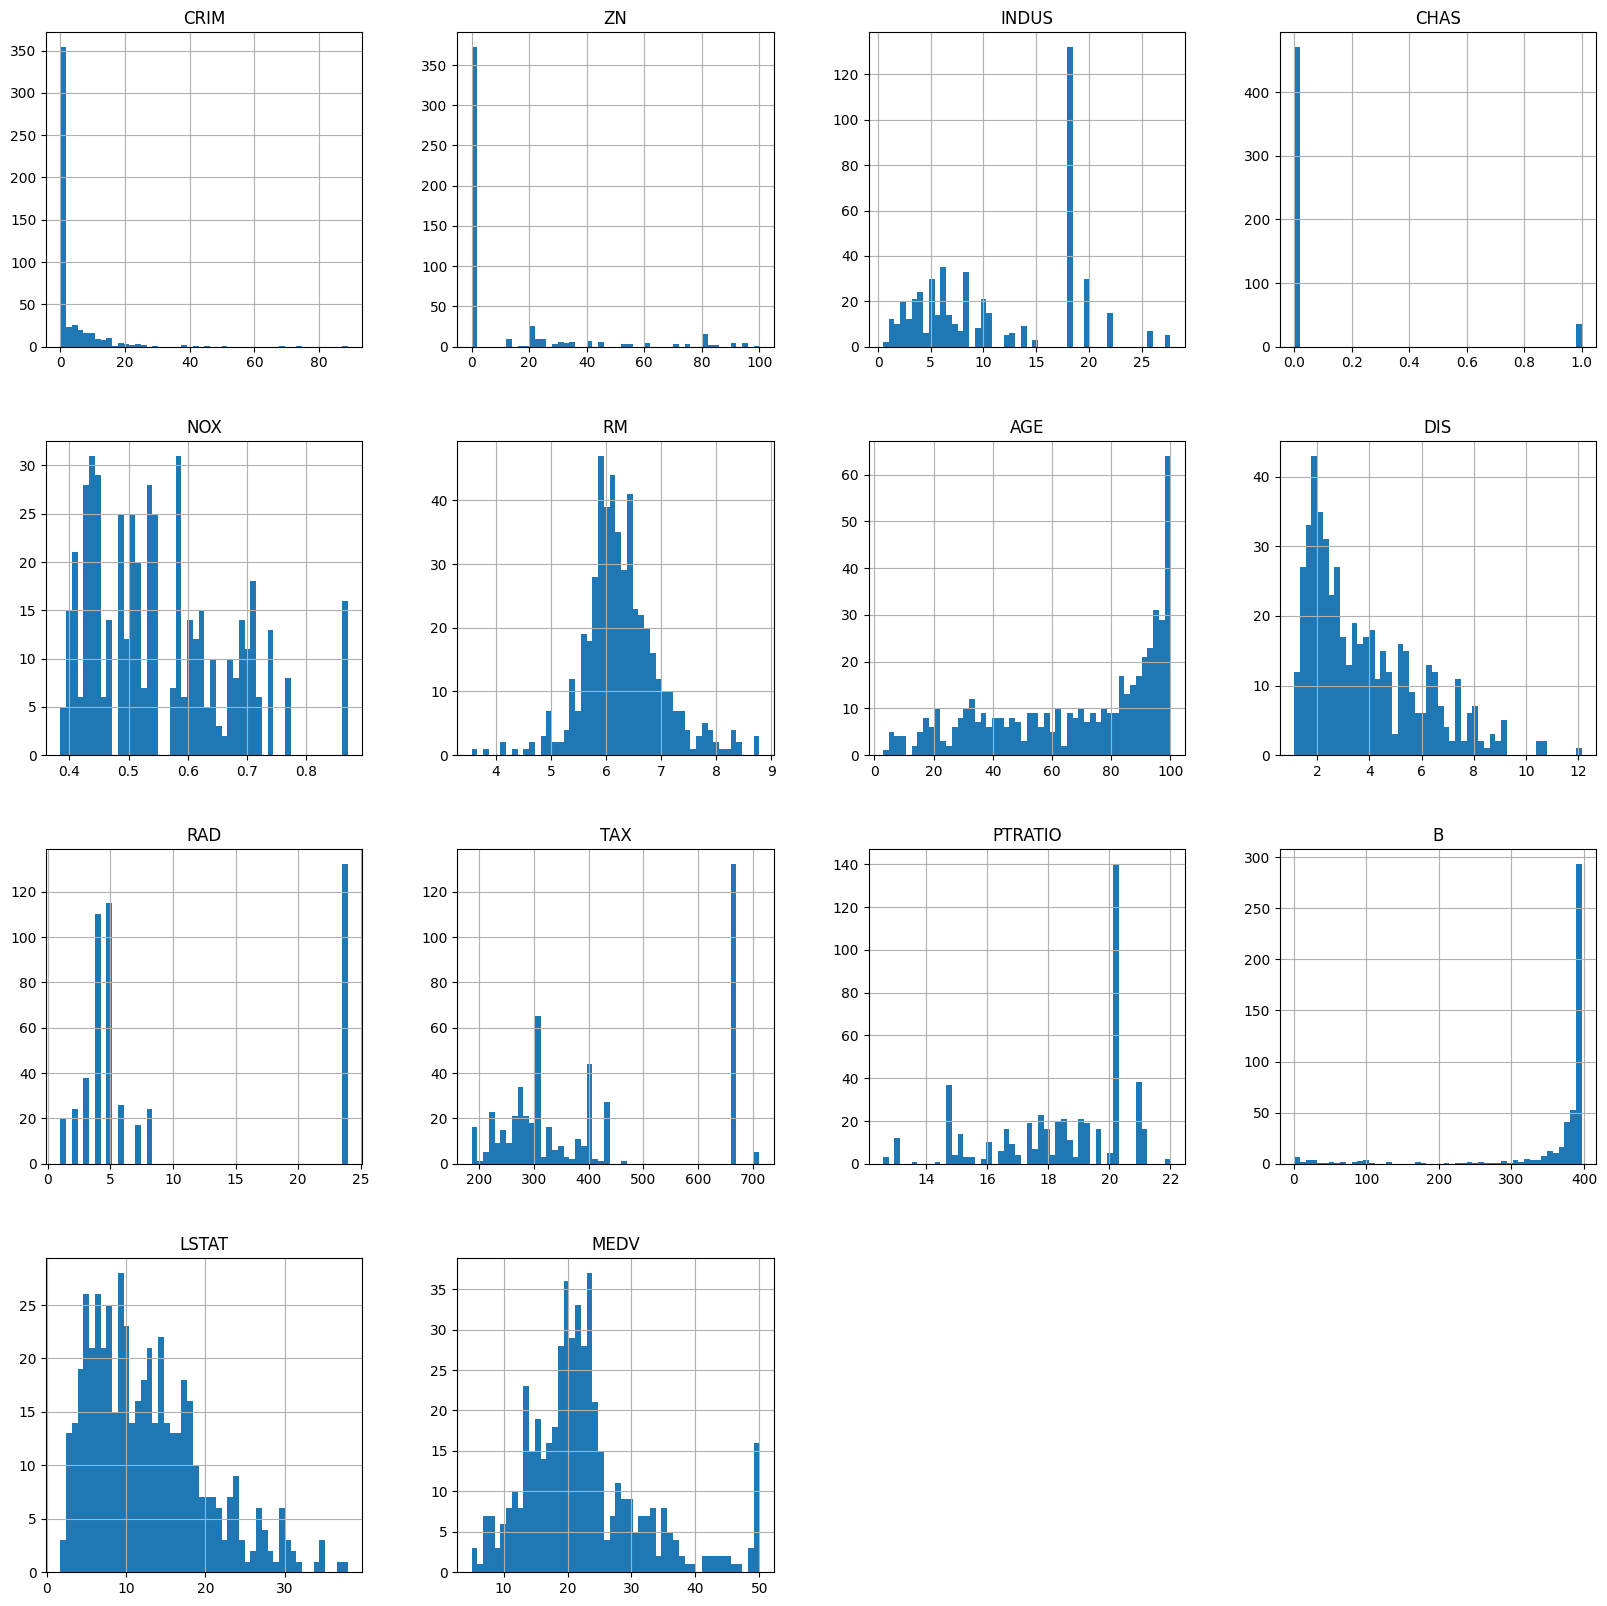

In [12]:
housing.hist(bins = 50,figsize = (20,20))

In [13]:
# test_set = data * test_ratio
test_set = 100 * (0.2)            
print(test_set)

20.0


In [14]:
import numpy as np
def split_train_test(data,test_ratio):
    np.random.seed(42)                                      
    shuffled = np.random.permutation(len(data))            
    test_set_size = int(len(data) * test_ratio)            
                                                            
    test_indices = shuffled[:test_set_size]                
    train_indices = shuffled[test_set_size:]                
    return data.iloc[train_indices],data.iloc[test_indices] 

In [15]:
train_set,test_set = split_train_test(housing,0.2)

In [16]:
print(f"rows of train set are : {len(train_set)}\nrows of test set are : {len(test_set)}")

rows of train set are : 405
rows of test set are : 101


In [17]:
from sklearn.model_selection import train_test_split
train_set,test_set = train_test_split(housing, test_size = 0.2, random_state = 42)

In [18]:
print(f"rows of train_set by sklearn are : {len(train_set)}\nrows of test_set by sklearn are : {len(test_set)}")

rows of train_set by sklearn are : 404
rows of test_set by sklearn are : 102


In [19]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits = 1, test_size = 0.2, random_state = 42)
for train_index,test_index in split.split(housing, housing['CHAS']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [20]:
strat_test_set['CHAS'].value_counts()

CHAS
0    95
1     7
Name: count, dtype: int64

In [21]:
strat_train_set['CHAS'].value_counts()

CHAS
0    376
1     28
Name: count, dtype: int64

In [22]:
print(95/7) , print(376/28)     

13.571428571428571
13.428571428571429


(None, None)

In [23]:
housing = strat_train_set.copy()        

In [24]:
housing.shape

(404, 14)

# Looking for correlations

In [25]:
corr_matrix = housing.corr()

In [26]:
corr_matrix['MEDV'].sort_values(ascending = False)         

MEDV       1.000000
RM         0.678740
B          0.361761
ZN         0.339741
DIS        0.240451
CHAS       0.205066
AGE       -0.364596
RAD       -0.374693
CRIM      -0.393715
NOX       -0.422873
TAX       -0.456657
INDUS     -0.473516
PTRATIO   -0.493534
LSTAT     -0.740494
Name: MEDV, dtype: float64

array([[<Axes: xlabel='MEDV', ylabel='MEDV'>,
        <Axes: xlabel='RM', ylabel='MEDV'>],
       [<Axes: xlabel='MEDV', ylabel='RM'>,
        <Axes: xlabel='RM', ylabel='RM'>]], dtype=object)

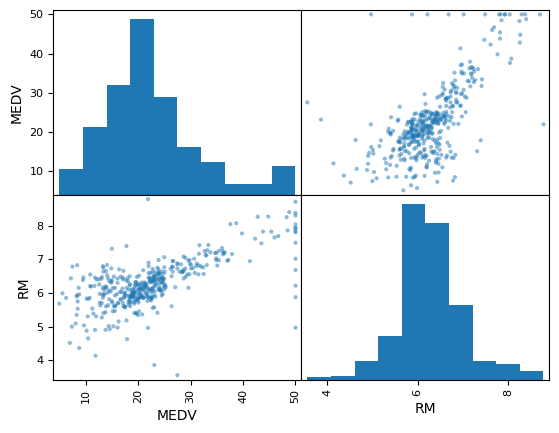

In [27]:
from pandas.plotting import scatter_matrix
attributes = ["MEDV","RM"]                     # positive correlation
scatter_matrix(housing[attributes])           

array([[<Axes: xlabel='MEDV', ylabel='MEDV'>,
        <Axes: xlabel='LSTAT', ylabel='MEDV'>],
       [<Axes: xlabel='MEDV', ylabel='LSTAT'>,
        <Axes: xlabel='LSTAT', ylabel='LSTAT'>]], dtype=object)

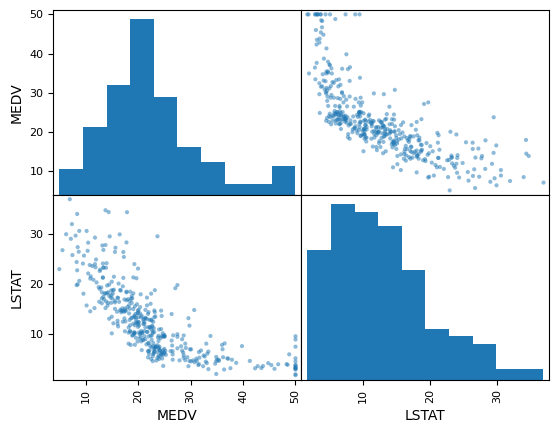

In [28]:
attributes = ["MEDV","LSTAT"]               # negative correlation
scatter_matrix(housing[attributes])

array([[<Axes: xlabel='MEDV', ylabel='MEDV'>,
        <Axes: xlabel='LSTAT', ylabel='MEDV'>,
        <Axes: xlabel='RM', ylabel='MEDV'>],
       [<Axes: xlabel='MEDV', ylabel='LSTAT'>,
        <Axes: xlabel='LSTAT', ylabel='LSTAT'>,
        <Axes: xlabel='RM', ylabel='LSTAT'>],
       [<Axes: xlabel='MEDV', ylabel='RM'>,
        <Axes: xlabel='LSTAT', ylabel='RM'>,
        <Axes: xlabel='RM', ylabel='RM'>]], dtype=object)

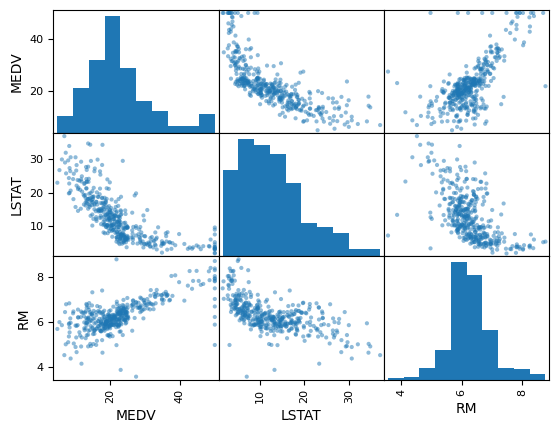

In [29]:
attr = ["MEDV","LSTAT","RM"]              # 3 attributes plotted  
scatter_matrix(housing[attr])

<Axes: xlabel='RM', ylabel='MEDV'>

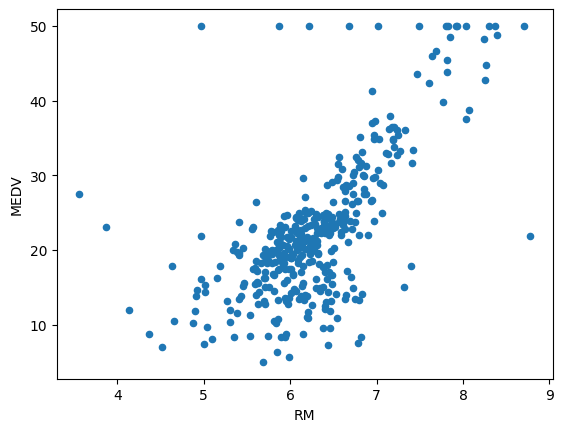

In [30]:
housing.plot(kind = "scatter" , x = "RM", y = "MEDV")       # positive correlation

<Axes: xlabel='LSTAT', ylabel='MEDV'>

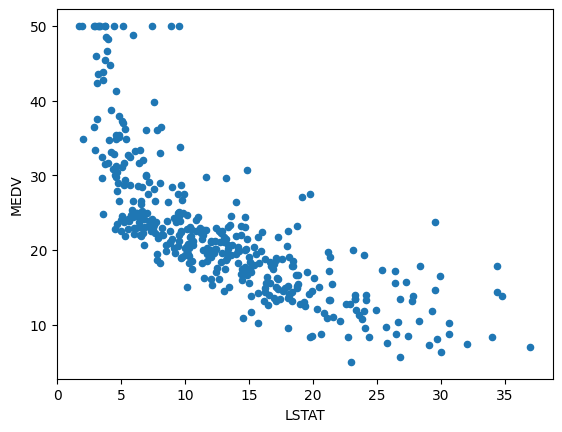

In [31]:
housing.plot(kind = "scatter" , x = "LSTAT" , y = "MEDV")         # negative correlation

## Adding a new attribute

In [32]:
housing["Tax_per_room"] = housing['TAX']/housing["RM"]

In [33]:
housing.head()            

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,Tax_per_room
254,0.04819,80.0,3.64,0,0.392,6.108,32.0,9.2203,1,315,16.4,392.89,6.57,21.9,51.571709
348,0.01501,80.0,2.01,0,0.435,6.635,29.7,8.3440,4,280,17.0,390.94,5.99,24.5,42.200452
476,4.87141,0.0,18.10,0,0.614,6.484,93.6,2.3053,24,666,20.2,396.21,18.68,16.7,102.714374
321,0.18159,0.0,7.38,0,0.493,6.376,54.3,4.5404,5,287,19.6,396.90,6.87,23.1,45.012547
326,0.30347,0.0,7.38,0,0.493,6.312,28.9,5.4159,5,287,19.6,396.90,6.15,23.0,45.468948


In [34]:
corr_matrix = housing.corr()
corr_matrix["MEDV"].sort_values(ascending = False)

MEDV            1.000000
RM              0.678740
B               0.361761
ZN              0.339741
DIS             0.240451
CHAS            0.205066
AGE            -0.364596
RAD            -0.374693
CRIM           -0.393715
NOX            -0.422873
TAX            -0.456657
INDUS          -0.473516
PTRATIO        -0.493534
Tax_per_room   -0.524702
LSTAT          -0.740494
Name: MEDV, dtype: float64

<Axes: xlabel='Tax_per_room', ylabel='MEDV'>

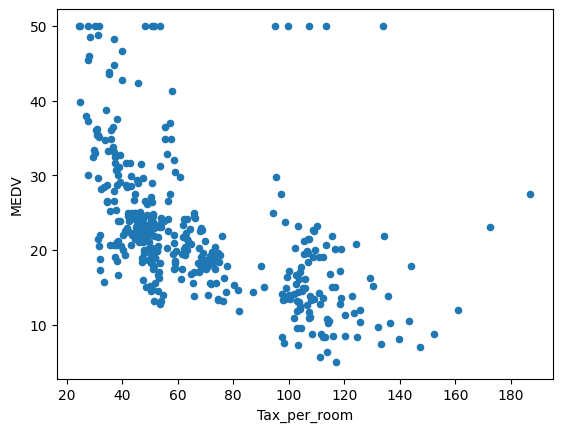

In [35]:
housing.plot(kind = "scatter" , x = "Tax_per_room", y = "MEDV")      # negative correlation

In [36]:
housing = strat_train_set.drop("MEDV",axis = 1)
housing_labels = strat_train_set["MEDV"].copy()

# Missing attribute

In [37]:
housing.info()     # RM chya 3 value null yet

<class 'pandas.core.frame.DataFrame'>
Index: 404 entries, 254 to 216
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     404 non-null    float64
 1   ZN       404 non-null    float64
 2   INDUS    404 non-null    float64
 3   CHAS     404 non-null    int64  
 4   NOX      404 non-null    float64
 5   RM       401 non-null    float64
 6   AGE      404 non-null    float64
 7   DIS      404 non-null    float64
 8   RAD      404 non-null    int64  
 9   TAX      404 non-null    int64  
 10  PTRATIO  404 non-null    float64
 11  B        404 non-null    float64
 12  LSTAT    404 non-null    float64
dtypes: float64(10), int64(3)
memory usage: 44.2 KB


In [38]:
housing.shape

(404, 13)

In [39]:
#option no- 1
# Get rid of the missing data points 
a = housing.dropna(subset = ["RM"])      
a

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
254,0.04819,80.0,3.64,0,0.392,6.108,32.0,9.2203,1,315,16.4,392.89,6.57
348,0.01501,80.0,2.01,0,0.435,6.635,29.7,8.3440,4,280,17.0,390.94,5.99
476,4.87141,0.0,18.10,0,0.614,6.484,93.6,2.3053,24,666,20.2,396.21,18.68
321,0.18159,0.0,7.38,0,0.493,6.376,54.3,4.5404,5,287,19.6,396.90,6.87
326,0.30347,0.0,7.38,0,0.493,6.312,28.9,5.4159,5,287,19.6,396.90,6.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,3.53501,0.0,19.58,1,0.871,6.152,82.6,1.7455,5,403,14.7,88.01,15.02
423,7.05042,0.0,18.10,0,0.614,6.103,85.1,2.0218,24,666,20.2,2.52,23.29
98,0.08187,0.0,2.89,0,0.445,7.820,36.9,3.4952,2,276,18.0,393.53,3.57
455,4.75237,0.0,18.10,0,0.713,6.525,86.5,2.4358,24,666,20.2,50.92,18.13


In [40]:
a.shape

(401, 13)

In [41]:
# option no : 2
# Get rid of whole attribute 
housing.drop("RM" ,axis = 1)       

,CRIM,ZN,INDUS,CHAS,NOX,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
254,0.04819,80.0,3.64,0,0.392,32.0,9.2203,1,315,16.4,392.89,6.57
348,0.01501,80.0,2.01,0,0.435,29.7,8.3440,4,280,17.0,390.94,5.99
476,4.87141,0.0,18.10,0,0.614,93.6,2.3053,24,666,20.2,396.21,18.68
321,0.18159,0.0,7.38,0,0.493,54.3,4.5404,5,287,19.6,396.90,6.87
326,0.30347,0.0,7.38,0,0.493,28.9,5.4159,5,287,19.6,396.90,6.15
...,...,...,...,...,...,...,...,...,...,...,...,...
155,3.53501,0.0,19.58,1,0.871,82.6,1.7455,5,403,14.7,88.01,15.02
423,7.05042,0.0,18.10,0,0.614,85.1,2.0218,24,666,20.2,2.52,23.29
98,0.08187,0.0,2.89,0,0.445,36.9,3.4952,2,276,18.0,393.53,3.57
455,4.75237,0.0,18.10,0,0.713,86.5,2.4358,24,666,20.2,50.92,18.13


In [42]:
housing.drop("RM",axis = 1).shape                

(404, 12)

In [43]:
# option no : 3
housing["RM"].fillna("0")

254    6.108
348    6.635
476    6.484
321    6.376
326    6.312
       ...  
155    6.152
423    6.103
98      7.82
455    6.525
216    5.888
Name: RM, Length: 404, dtype: object

In [44]:
# median
median = housing["RM"].median()

In [45]:
median            

np.float64(6.211)

In [46]:
housing["RM"].fillna(median)              

254    6.108
348    6.635
476    6.484
321    6.376
326    6.312
       ...  
155    6.152
423    6.103
98     7.820
455    6.525
216    5.888
Name: RM, Length: 404, dtype: float64

In [47]:
housing.shape

(404, 13)

---> filling missing value with the help of SimpleImputer

In [48]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = "median")      
imputer.fit(housing)                              
                                                  

SimpleImputer(strategy='median')

In [49]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = 'most_frequent')              
imputer.fit(housing)

SimpleImputer(strategy='most_frequent')

In [50]:
imputer.statistics_       

array([1.5010e-02, 0.0000e+00, 1.8100e+01, 0.0000e+00, 5.3800e-01,
       5.7130e+00, 1.0000e+02, 3.4952e+00, 2.4000e+01, 6.6600e+02,
       2.0200e+01, 3.9690e+02, 6.3600e+00])

In [51]:
x = imputer.transform(housing)   

In [52]:
housing_trans = pd.DataFrame(x, columns = housing.columns)   

housing_trans madhe ek pan 'Null' value nahi ye

In [53]:
housing_trans.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,6.276191,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822,12.791609
std,8.099383,22.150636,6.877817,0.254290,0.116875,0.712896,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235,7.235740
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000
25%,0.086962,0.000000,5.190000,0.000000,0.453000,5.875000,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.847500
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.209000,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000,11.570000
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.630000,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,17.102500
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000


In [54]:
housing_trans.shape

(404, 13)

# Creating a pipeline

In [55]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
my_pipeline = Pipeline([                                         
    ("imputer" , SimpleImputer(strategy = "median")),            
    # ..... add as many as you want in your pipeline            
    ("std_scaler", StandardScaler()),
])

In [56]:
housing_pipe_trans = my_pipeline.fit_transform(housing)

In [57]:
housing_pipe_trans

array([[-0.43942006,  3.12628155, -1.12165014, ..., -0.97491834,
         0.41164221, -0.86091034],
       [-0.44352175,  3.12628155, -1.35893781, ..., -0.69277865,
         0.39131918, -0.94116739],
       [ 0.15682292, -0.4898311 ,  0.98336806, ...,  0.81196637,
         0.44624347,  0.81480158],
       ...,
       [-0.43525657, -0.4898311 , -1.23083158, ..., -0.22254583,
         0.41831233, -1.27603303],
       [ 0.14210728, -0.4898311 ,  0.98336806, ...,  0.81196637,
        -3.15239177,  0.73869575],
       [-0.43974024, -0.4898311 ,  0.37049623, ..., -0.97491834,
         0.41070422,  0.09940681]], shape=(404, 13))

In [58]:
housing_pipe_trans.shape

(404, 13)

# Selecting a desired model for Dragon real Estate

In [59]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# model = LinearRegression()
# model = DecisionTreeRegressor()
model = RandomForestRegressor()

model.fit(housing_pipe_trans,housing_labels)

RandomForestRegressor()

In [60]:
some_data = housing.iloc[:5]

In [61]:
some_labels = housing_labels[:5]

In [62]:
my_model_testing = my_pipeline.transform(some_data)         

In [63]:
model.predict(my_model_testing)              # predictions

array([22.591, 25.56 , 16.266, 23.291, 23.401])

In [64]:
list(some_labels)                 # given

[21.9, 24.5, 16.7, 23.1, 23.0]

# Evaluating our model 

In [65]:
from sklearn.metrics import mean_squared_error
housing_predictions = model.predict(housing_pipe_trans)
mse = mean_squared_error(housing_predictions,housing_labels)
rmse = np.sqrt(mse)

In [66]:
rmse             # for linear Regression = 4.833978188367824

np.float64(1.1625938022413067)

# Using better evaluation technique - Cross Validation

In [67]:
# 1 2 3 4 5 6 7 8 9 10
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, housing_pipe_trans, housing_labels, scoring = "neg_mean_squared_error" , cv = 10)
rmse_scores = np.sqrt(-scores)

In [68]:
rmse_scores         # errors

array([2.78272062, 2.73946443, 4.358275  , 2.61043916, 3.22224989,
       2.73080141, 4.5729833 , 3.22770263, 3.23378642, 3.15272144])

cross validation kelyavar samajla ki "0" nahi yet ye error

In [69]:
def print_scores(scores):
    print('scores: ', scores)
    print('mean : ',scores.mean())
    print("standard deviation : ", scores.std())

In [70]:
print_scores(rmse_scores)

scores:  [2.78272062 2.73946443 4.358275   2.61043916 3.22224989 2.73080141
 4.5729833  3.22770263 3.23378642 3.15272144]
mean :  3.2631144294653396
standard deviation :  0.6438504078705605


# Saving the model (joblib)

In [71]:
from joblib import dump,load
dump(model, "Dragon.joblib")

['Dragon.joblib']

# Testing the model on test data

In [72]:
X_test = strat_test_set.drop("MEDV", axis = 1)
Y_test = strat_test_set["MEDV"].copy()
X_test_prepared = my_pipeline.transform(X_test)
final_predictions = model.predict(X_test_prepared)

In [73]:
final_mse =  mean_squared_error(Y_test,final_predictions)

In [74]:
final_rmse = np.sqrt(final_mse)

In [75]:
final_rmse                     

np.float64(2.8655533394401265)

In [76]:
# print("final_predictions :",final_predictions )
# print("orignal MEDV :", list(Y_test))

In [77]:
# X_test_prepared[0]    - used in model usage

# Model usage